## Algoritmo K-means (Core)

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

Enlace al dataset:[Customer segmentation](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)



Objetivo de la Actividad

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.



**Descripción del Algoritmo K-means**

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.
2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.




### Instrucciones

1. Carga del Dataset:
  - El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
  - Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importar el dataset
mall = pd.read_csv('../data/Mall_Customers.csv')
print(mall.info())
mall.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



2. Selección de Variables:
  - Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = mall[['Annual Income (k$)', 'Spending Score (1-100)']]



3. Implementación de K-means:
  - Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
  - Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score para k=3: 0.46761358158775435


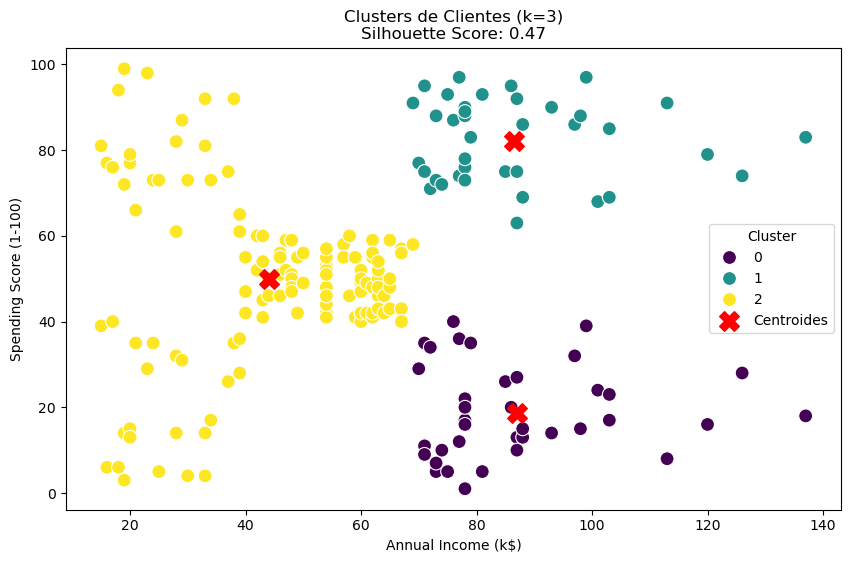

c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score para k=4: 0.4931963109249047


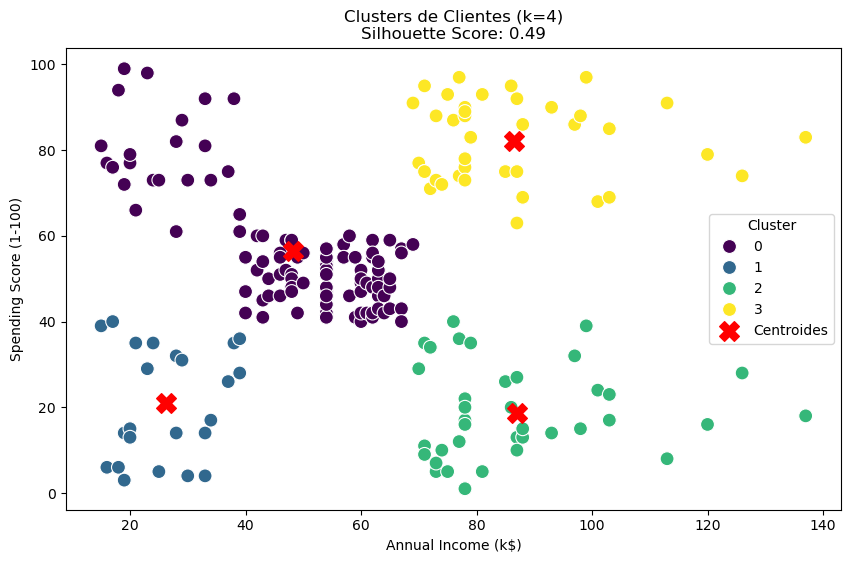

c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score para k=5: 0.553931997444648


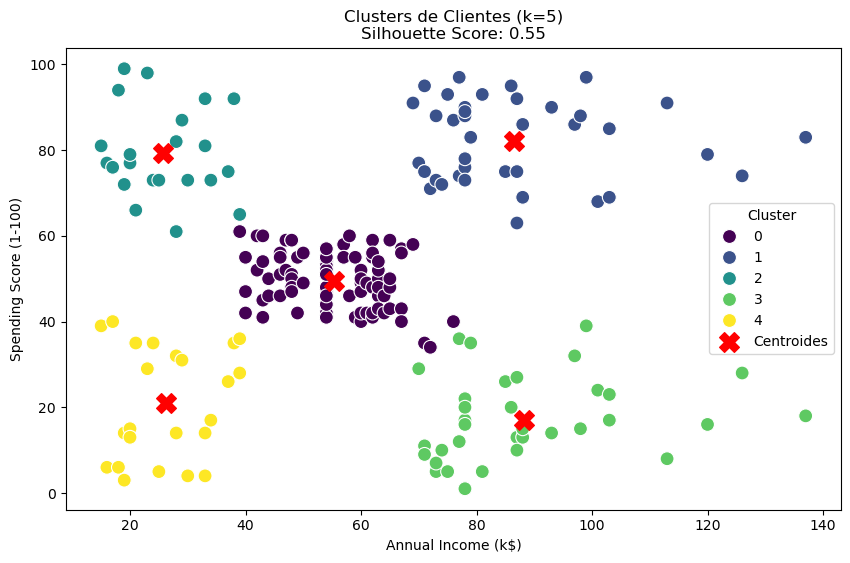

In [13]:


# Seleccionar las variables de interés
X = mall[['Annual Income (k$)', 'Spending Score (1-100)']]


def plot_clusters_with_silhouette(X, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, y_kmeans)
    print(f'Silhouette Score para k={k}: {silhouette_avg}')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_kmeans, palette='viridis', s=100)
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
    plt.title(f'Clusters de Clientes (k={k})\nSilhouette Score: {silhouette_avg:.2f}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cluster')
    plt.show()

# Visualizar y calcular Silhouette Score para k = 3, 4 y 5
plot_clusters_with_silhouette(X, 3)
plot_clusters_with_silhouette(X, 4)
plot_clusters_with_silhouette(X, 5)



4. Elbow Method:
  - Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packag

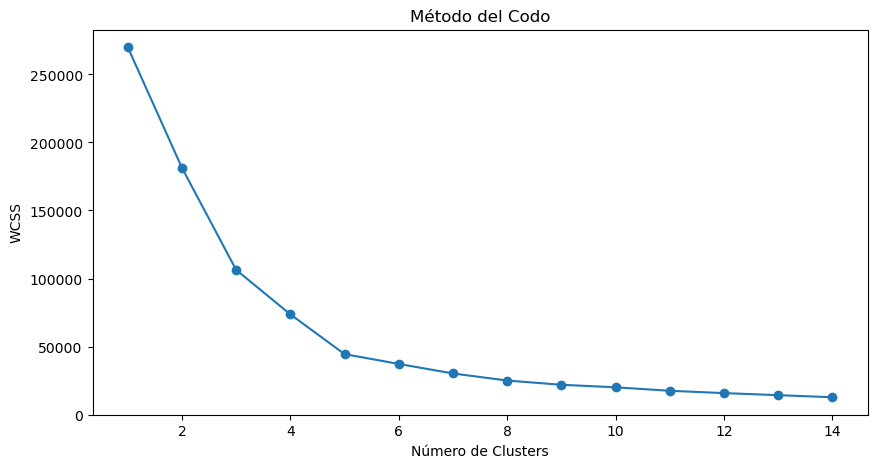

In [19]:
# Método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), wcss, marker='o', linestyle='-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\diego\miniconda3\envs\bootcamp_mitic_ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


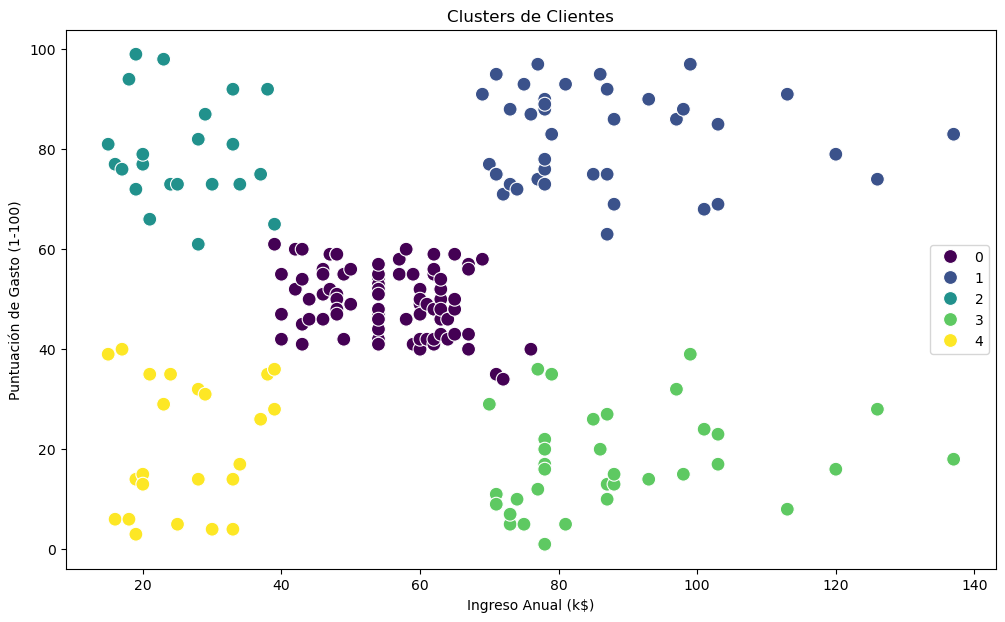

In [18]:
# Suponiendo que el número óptimo de clusters es 5 (determinado por el método del codo)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Añadir los clusters al DataFrame
mall['Cluster'] = y_kmeans

# Visualizar los clusters
plt.figure(figsize=(12, 7))
sns.scatterplot(data=mall, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend()
plt.show()



## 5. Interpretación de Clusters:
  - Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?


Basado en el gráfico, los clientes están agrupados según dos características: **Ingreso Anual** y **Puntuación de Gasto**.

### Características por cluster:
1. **Cluster 0 (púrpura)**: 
   - **Ingreso Anual:** Medio.
   - **Puntuación de Gasto:** Media-baja.
   - **Interpretación:** Clientes con ingresos promedio que gastan moderadamente.

2. **Cluster 1 (azul oscuro)**:
   - **Ingreso Anual:** Alto.
   - **Puntuación de Gasto:** Alta.
   - **Interpretación:** Clientes con alto poder adquisitivo que gastan mucho (segmento premium).

3. **Cluster 2 (verde azulado)**:
   - **Ingreso Anual:** Medio.
   - **Puntuación de Gasto:** Alta.
   - **Interpretación:** Clientes con ingresos medios, pero con una disposición significativa para gastar (potenciales compradores frecuentes).

4. **Cluster 3 (amarillo)**:
   - **Ingreso Anual:** Bajo.
   - **Puntuación de Gasto:** Baja.
   - **Interpretación:** Clientes con bajos ingresos y menor gasto (segmento sensible a precios).

5. **Cluster 4 (verde claro)**:
   - **Ingreso Anual:** Alto.
   - **Puntuación de Gasto:** Baja.
   - **Interpretación:** Clientes con alto poder adquisitivo pero bajo gasto (segmento conservador).

---

### Estrategias de marketing personalizadas:
1. **Cluster 0**:
   - Ofrecer promociones especiales o descuentos para aumentar la disposición a gastar.
   - Incentivar compras con programas de fidelidad.

2. **Cluster 1**:
   - Promover productos o servicios premium y de lujo.
   - Ofrecer experiencias personalizadas como eventos exclusivos.

3. **Cluster 2**:
   - Diseñar campañas que resalten la relación calidad-precio.
   - Introducir productos con precios medios y promociones atractivas.

4. **Cluster 3**:
   - Implementar descuentos agresivos o paquetes promocionales.
   - Destacar productos esenciales o de bajo costo.

5. **Cluster 4**:
   - Enfocarse en estrategias que resalten el valor y exclusividad, incentivando un mayor gasto.
   - Ofrecer productos de alta calidad pero con precios competitivos para captar su interés.


## 6. Análisis de Resultados:
  - Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?



### **Insights por grupo**:

1. **Cluster 0 (Ingreso Medio, Gasto Medio-Bajo)**:
   - Este grupo parece representar a **clientes prudentes**. Aunque tienen ingresos promedio, no gastan tanto como podrían.
   - **Insight:** Podrían estar buscando valor antes de gastar, o prefieren ahorrar. Es posible que respondan bien a descuentos atractivos o productos de calidad a precio razonable.

2. **Cluster 1 (Ingreso Alto, Gasto Alto)**:
   - Este es el grupo más **rentable** y dispuesto a gastar. Representa a clientes con alto poder adquisitivo y estilo de vida orientado al consumo.
   - **Insight:** Clientes premium que buscan calidad, exclusividad y experiencias diferenciadas. Es crucial fidelizarlos, ya que podrían representar una proporción significativa de los ingresos.

3. **Cluster 2 (Ingreso Medio, Gasto Alto)**:
   - Este grupo incluye **compradores impulsivos o frecuentes** con ingresos medios, pero una disposición alta al consumo.
   - **Insight:** Es ideal para estrategias que aumenten la frecuencia de compra o cross-selling (venta cruzada). Por ejemplo, promociones que ofrezcan beneficios adicionales si gastan más.

4. **Cluster 3 (Ingreso Bajo, Gasto Bajo)**:
   - Representa a clientes **cautos y sensibles al precio**. Su gasto es limitado debido a sus bajos ingresos.
   - **Insight:** Este grupo puede no ser tan rentable, pero puede ser captado mediante productos básicos o precios competitivos. Ofrecer promociones y valores esenciales puede ser clave.

5. **Cluster 4 (Ingreso Alto, Gasto Bajo)**:
   - Este grupo es curioso: **clientes adinerados pero conservadores en el gasto**.
   - **Insight:** Podrían estar interesados en productos que ofrezcan un retorno claro de valor, o simplemente no ven razones para gastar más. Esto requiere estrategias que eduquen sobre los beneficios exclusivos de productos premium.

---

### **Patrones o comportamientos comunes**:
1. **Relación entre ingreso y gasto**:
   - Los ingresos altos no siempre se traducen en un alto gasto (Cluster 4). Esto sugiere que los valores o prioridades del cliente también juegan un rol importante.
   - Los clientes con ingresos bajos gastan menos, como es de esperar, y priorizan compras esenciales (Cluster 3).

2. **Segmentos de alto gasto (Clusters 1 y 2)**:
   - Representan clientes clave que impulsan los ingresos. Retenerlos con programas de fidelidad o experiencias exclusivas será crucial.

3. **Segmentos prudentes (Clusters 0 y 4)**:
   - Estos clientes requieren más convencimiento. Incentivar el gasto con promociones específicas podría hacer que pasen a un nivel de consumo más alto.

---

### **Acciones basadas en los insights**:
- **Clusters 1 y 2 (altos gastos):** Focalizar estrategias premium y programas de fidelización. Ejemplo: tarjetas de membresía o acceso a eventos VIP.
- **Cluster 0 (gasto prudente):** Diseñar campañas basadas en descuentos estratégicos o valores adicionales.
- **Cluster 3 (bajos ingresos/gastos):** Crear productos asequibles o combos promocionales para este segmento.
- **Cluster 4 (ingresos altos, gasto bajo):** Enfocarse en educar sobre el valor diferencial de productos premium, destacando calidad o exclusividad.



### Expansión del Algoritmo y Aplicaciones

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

- Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
- Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.
- Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.